# Homework 04: Bayes and DRV's
***

**Name**: CJ Kennedy

***

This assignment is due on Canvas by **6:00PM on Friday September 23**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do $\color{red}{\text{Kernel}}$ $\color{red}\rightarrow$ $\color{red}{\text{Restart & Run All}}$ as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** $\color{red}{\text{write a summary of the results}}$ in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

Import Pandas and NumPy.

In [1]:
# Per the standard import pandas as 'pd' and numpy as 'np'
import pandas as pd
import numpy as np

# You may need binom to calculate a binomial coefficient
from scipy.special import binom

In case you create a graph, load Matplotlib's Pylab library to set up Jupyter so that it will plot directly in the notebook.

In [2]:
import matplotlib.pylab as plt
%matplotlib inline 
    # 'inline' puts your graph in the cell versus a new popup window

# Problem 1
***
You have become concerned about your diet and decide that at each of your regular three meals per day that you eat, you are going to add a serving with a particular important nutrient. Sometimes you add vitamin C, sometimes you add protein, and sometimes you add iron.

For instance, on a given day, you may eat an additional vitamin C serving for breakfast, an additional protein serving for lunch, and another additional protein serving for dinner.

On a different day you decide to add iron to breakfast, vitamin C to lunch, and protein to dinner. What you choose to add to each meal is a random choice.

Let $X$ be a random variable that indicates how many servings of protein you added on a given day.

### Part A
***

***(1 points)*** What is the probability mass function of $X$?

***solution:*** 

Let, $x_i$ represent the possible values of vitamin c, protein, and iron. Then, the probability mass function for $X$ is defined as:
$ p(X=x_i) = P({s \in S | X(s) = x_i} ) $

The binomial distrubtion then describes:
 
$ p_X(k) = P(X=k) = \binom nk p^k (1-p)^{n-k} $

Thus, this allows for finding the PMS of X:



$$\begin{array}{c|ccc}
a & 0 & 1 & 2 & 3 \\
\hline
p(a) & \frac{8}{27} & \frac{4}{9} & \frac{2}{9} & \frac{1}{27} \\
\end{array}$$

### Part B
***

***(1 points)*** What is the cumulative distribution function for $X$?



***solution:*** 

The cumulative distribution function can be solved for with the PMS. Speficially:

$ F(x_i) = P(x_i)+P(x_{i-1}) $

Thus, the CDF can be solve for:
$$\begin{array}{c|ccc}
a & 0 & 1 & 2 & 3 \\
\hline
F(a) & \frac{8}{27} & \frac{20}{27} & \frac{26}{27} & 1 \\
\end{array}$$

### Part C
***

***(1 points)*** What is the probability that you added 2 or fewer servings of protein on a day?

***solution:***

The probability on a day that we added 2 or less protein servings is

$$
F(2) = P(X \leq 2) = \frac{26}{27}
$$


### Part D
***

***(1 points)*** What is the probability that you added 2 or more servings or protein?


***solution:*** 

The probability on a day that we added 2 or more protein servings is

$$
F(2) = P(X \geq 2) = \frac{2}{9}+\frac{1}{27}=\frac{7}{27}
$$

# Problem 2
***

You drink 3 cups of coffee each day, and in a continuation of your plans to change your diet you decide to stop using sugar in your coffee.

However, you find it too difficult to completely stop using sugar. Therefore, 20% of the time you end up using sugar in your coffee anyway.

Let $X$ be the random variable that indicates the number of 'sugared' coffees out of three that you drink per day.

***(1 points)*** What is the probability mass function? Consider 'no sugar' to be success.

***solution:*** 

Elements from the PMF are described by:

$ p_X(k) = P(X=k) = \binom nk p^k (1-p)^{n-k} $

For example, $p_X(1)$ and $p_X(2)$ are solved for by: 

$ p_X(1) = \binom31 (\frac{1}{5})^1(1-\frac{4}{5})^2 = \frac{48}{125} $

$ p_X(2) = \binom32 (\frac{1}{5})^2(1-\frac{4}{5}) = \frac{12}{125} $

Continuing this, the whole PMF table can be created:
$$\begin{array}{c|ccc}
a & 0 & 1 & 2 & 3 \\
\hline
p(a) & \frac{64}{125} & \frac{80}{125} & \frac{48}{125} & \frac{1}{125} \\
\end{array}$$

The following code verifies the binomial pmf.

In [3]:
def binomial_pmf(n, p):
    pmf = np.array([binom(n,k)*(p**k)*((1-p)**(n-k)) for k in range(n+1)])
    return pmf

pmf = binomial_pmf(3,.2)

for k, prob in enumerate(pmf):
    print("{} | {:0.4f}".format(k, prob))
    
# Here is a check that your binomial_pmf function at least sums to 1
# assert np.sum(pmf)==1, "Error: pmf does not add up to 1"
#np.sum(pmf)

0 | 0.5120
1 | 0.3840
2 | 0.0960
3 | 0.0080


# Problem 3
***
Consider the probability mass function $P(X=x) = 2nx^2-2nx$ with the discrete random variable taking on values $1, 2, 3, 4$.

### Part A
***

***(3 points)*** What is the value of $n$?

***solution:*** 

Evaluate the probability mass function for the given values and equation:

$$\begin{array}{c|ccc}
a & 1 & 2 & 3 & 4 \\
\hline
p(a) & 0 & 4n & 12n & 24n \\
\end{array}$$

Given the sum of the elements must equal 1:

$$
 \sum_{x_i} p(x_i) = p(x_1) + p(x_2) + p(x_3) + ... = 1 
 \rightarrow 0+4n+12n+24n = 1
$$

$$ 40n = 1 \Rightarrow n = \frac{1}{40}
$$

### Part B
***

 ***(2 points)*** What is $P(X=4)$?

***solution:*** 

Rewrite: 

$ P(X=4) = p(4) = 24n $

Substitute n:

$ P(X=4) = \frac{24}{40} = \frac{3}{5} $

 ### Part C
 ***
 
***(2 points)*** What is $P(X\leq3)=$?

***solution:*** 

Rewrite and subsitute:

$P(X\leq4)= p(4)+p(3)+p(2)+p(1) = \frac{40}{40} = 1 $

# Problem 4
***

One of the following graphs (either graph 1 or graph 2) is a PMF and one is not.

***(2 points)*** Draw the CDF for the one valid PMF.

GRAPH 1
![title](npdf.png)

GRAPH 2
![title](ypdf.png)

The PMF has the property:

$ \sum_{x_i} p(x_i) = p(x_1) + p(x_2) + p(x_3) + ... = 1 $

The sum of all the values of each "point" in the graph would need to equal 1.

Thus, GRAPH 2 is the correct PMF since $.5+.3+.2=1$.

Next, the CDF is defined as:

$ F(a) = P(X\leq a) $

The following code then creates datapoints and plots CDF:


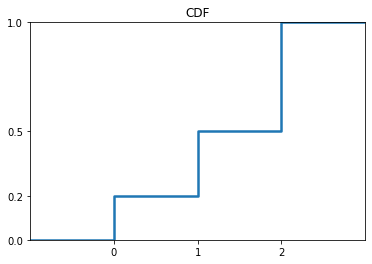

In [4]:
# create data
x = np.array([-1, 0, 1, 2, 3])
y = np.array([0, 0, .2, .2+.3,.2+.3+.5])

# plot
fig, ax = plt.subplots()

ax.step(x, y, linewidth=2.5)

ax.set(xlim=(-1, 3), xticks=np.arange(0,3),
       ylim=(0, 1), yticks=np.arange(0, 2))
ax.set_yticks([0, .2, .5, 1])
ax.set_title("CDF")  
plt.show()

# Problem 5
***

![title](3die.png)
You are the proud new owner of a three sided die!

The sides are marked '1', '2', and '3'. Let $X$ be the amount of 3's obtained after rolling the die twice.

If $S$ is the sample space, then $X:S\to\mathbb{R}$, and $p(x_i)=P(X=x_i)=P(\{s\in S|X(s)=x_i\})$

### Part A
***

   1] ***(2 points)*** What is $X((3, 3))$?
   
   2] ***(2 points)*** What is $X((2, 3))$?

***solution:*** 
1] $X((3, 3))$ is the event that a 3 is rolled followed by another 3 rolled. Thus, $X((3, 3))=2$

2] $X((2, 3))$ is the event that a 2 is rolled followed by a 3. Thus, $X((2, 3))=1$

### Part B
***

   1] ***(2 points)*** What is $p(2)$?

   2] ***(2 points)*** What is $p(1)$?

***solution:*** 
The probability of rolling a 3 is $\frac{1}{3}$, the dice is rolled twice ($n=2$) so:

1] $p(2) \Rightarrow P(X=2) = \binom 22 \frac{1}{3}^2 (1-p)^{0} $ = \frac{1}{9}$
\binom nk p^k (1-p)^{n-k} 
2] $p(1) \Rightarrow P(X=1) = \binom 21 \frac{1}{3} (1-p)^{1} $ = \frac{5}{9} $

### Part C
***

1] ***(2 points)*** Create a table of values for the PMF.

2] ***(4 points)*** Create (code) a graph for the PMF.

***solution:*** 

$$\begin{array}{c|cc}
a & 0 & 1 & 2 \\
\hline
p(a) & \frac{4}{9} & \frac{4}{9} & \frac{1}{9} \\
\end{array}$$


0 | 0.4444
1 | 0.4444
2 | 0.1111


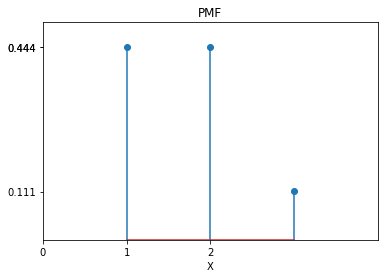

In [5]:
# adapted from nb7 
def binomial_pmf(n, p):
    pmf = np.array([binom(n,k)*(p**k)*((1-p)**(n-k)) for k in range(n+1)])
    return pmf

pmf = binomial_pmf(2,1/3)

for k, prob in enumerate(pmf):
    print("{} | {:0.4f}".format(k, prob))
    
# plot
fig, ax = plt.subplots()

ax.stem(range(1,len(pmf)+1),pmf)

ax.set(xlim=(0, 4), xticks=np.arange(0, 4),
       ylim=(0, .5), yticks=np.arange(0, 1))
#ax.set_yticks([ .2963, .44, .22, .037])
ax.set_yticks([ .444, .444, .111])
ax.set_xticks([ 0, 1, 2])
ax.set_title("PMF")  
ax.set_xlabel("X")
plt.show()

### Part D
***

   1] ***(2 points)*** Create a table of values for the CDF.

   2] ***(2 points)*** Create a piecewise function for the CDF.

   3] ***(4 points)*** Create (code) a graph for the CDF.

***solution:*** Put your solution to Part D, #1, here:

$$\begin{array}{c|ccc}
a & 0 & 1 & 2 & 3 \\
\hline
F(a) & \frac{8}{27} & \frac{20}{27} & \frac{26}{27} & 1 \\
\end{array}$$

***solution:*** Put your solution to Part D, #2, here:

$$
\begin{equation}
F(a)=
    \begin{cases}
        \frac{8}{27} & \text{if } x = 0\\
        \frac{20}{27} & \text{if } x = 1\\
        \frac{26}{27} & \text{if } x = 2\\
        1 & \text{if } x = 3\\
    \end{cases}
\end{equation}
$$

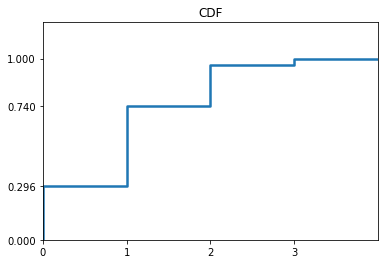

In [6]:
# part D, #3
# create data
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 8/27, 20/27, 26/27,1])

# plot and set limits
fig, ax = plt.subplots()

ax.step(x, y, linewidth=2.5)

ax.set(xlim=(0, 4), xticks=np.arange(0,4),
       ylim=(0, 1.2), yticks=np.arange(0, 2))
ax.set_yticks([0, .296, .74, 1])
ax.set_title("CDF")  
plt.show()

# Problem 6
***

### Part A

We are still playing with our new three sided die and we are still considering rolling a '3' a success. Only now we are rolling the die 10 times!

Suppose you actually rolled the 3-sided die ten times and counted how many times you rolled a '3'.

You could get zero amount of 3's.

You could roll a '3' only once.

You could roll a '3' two out of ten times.

You might even roll a '3' ten out of ten times!

Write a $\color{red}{\text{function}}$ that takes in the parameters $n=10$ (for ten rolls of the 3-sided die) and $p=\frac{1}{3}$ (for the probability of rolling a '3'). The function should $\color{red}{\text{return the PMF}}$ as a Numpy array.

***(4 points)*** Use the function to print out the PMF as a table of values after rolling the 3-sided die 10 times.

i.e. the table should show the probability of rolling zero 3's, one 3, two 3's,..., ten 3's.

In [7]:
# Adapted from nb07
def binomial_pmf(n, p):
    pmf = np.array([binom(n,k)*(p**k)*((1-p)**(n-k)) for k in range(n+1)])
    return pmf

pmf = binomial_pmf(10, 1/3) # rolling the 3-sided die 10 times looking for 3's


for k, prob in enumerate(pmf):
    print("{} | {:0.5f}".format(k, prob))

0 | 0.01734
1 | 0.08671
2 | 0.19509
3 | 0.26012
4 | 0.22761
5 | 0.13656
6 | 0.05690
7 | 0.01626
8 | 0.00305
9 | 0.00034
10 | 0.00002


### Part B

Suppose you rolled the die ten times and wrote down how many 3's resulted.

Then, you again rolled the die ten times and again wrote down how many 3's resulted.

And again you roll ten times and record. And again. And again.

In totality, lets say you recorded results 20 times. That is, twenty times in a row you rolled the 3-sided die 10 times and recorded the amount of 3' that appeared out of the 10 rolls.

You might get 20 results like [2 2 4 4 2 4 5 2 5 2 2 4 2 1 3 1 3 2 3 3] representing 2 out of 10, 2 out of ten, 4 out of ten, etc.

In order to determine how many successes (amount of 3's) TYPICALLY result when you roll this die ten times, you could look at a histogram (a distribution) of your 20 recordings. Better yet, a more accurate picture results from looking at a distribution of 100000 recordings.

***(4 points)*** Create (code) a density histogram of 100000 results to get an estimation of the distribution (aka PMF).

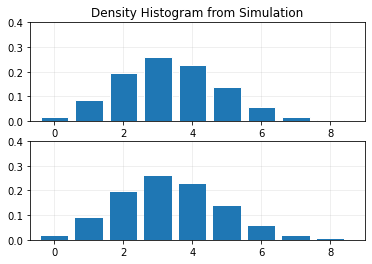

In [8]:
# Adapted from nb07
n = 10
p = 1/3

sample = np.random.binomial(n=n, p=p, size=100000)
bins = np.arange(-0.5, 11.5, 1)

X = np.array(range(n+1))
pmf = binomial_pmf(n, p)

fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].hist(sample, edgecolor='white', density=True, bins=bins, rwidth=0.8)
ax[0].set_axisbelow(True)
ax[0].grid(alpha=0.25)
ax[0].set_xlim([-0.7, 9]);
ax[0].set_ylim([0, 0.4])
ax[0].set_title("Density Histogram from Simulation")
ax[1].set_ylim([0, 0.4])
ax[1].set_xlim([-0.7, 9]);
ax[1].bar(X, pmf)
ax[1].set_axisbelow(True)
ax[1].grid(alpha=0.25);

# Part C

***(1 point)*** From the PMF just created, what appears to be the most common result? In other words, how many times will '3' most commonly appear after rolling a 3-sided die ten times?

***solution:*** 

The top histogram is the PMF created from a sample distribution while the bottom histogram is a PMF created with proper calculation. 

According to both histograms, the most common result is 3.

### Rubric Check
***
***(5 points)*** Makesure your answers are thorough but not redundant. Explain your answers, don't just put a number. Make sure you have matched your questions on Gradescope. Make sure your PDF is correct and your LaTeX is correct. etc. etc. BE NEAT.